In [84]:
# Setup plotting
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [85]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import RandomOverSampler


hotel = pd.read_csv('data/hotel_train.csv')
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,0,122,2016,December,50,8,0,3,2,...,A,1,No Deposit,83.0,NaN,0,Transient-Party,68.00,0,0
1,City Hotel,1,208,2016,July,31,30,2,2,2,...,A,0,No Deposit,9.0,NaN,0,Transient,80.75,0,0
2,City Hotel,0,212,2016,September,40,26,1,3,2,...,A,1,No Deposit,9.0,NaN,0,Transient-Party,129.65,0,1
3,Resort Hotel,1,120,2016,May,20,14,2,5,2,...,D,0,No Deposit,240.0,NaN,0,Transient,73.00,0,3
4,Resort Hotel,0,40,2017,January,3,16,1,2,1,...,A,0,No Deposit,NaN,NaN,0,Transient-Party,55.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95507,City Hotel,0,32,2016,November,47,19,0,1,2,...,A,0,No Deposit,9.0,NaN,0,Transient,79.20,0,0
95508,Resort Hotel,0,2,2016,March,11,12,0,1,2,...,F,0,No Deposit,250.0,NaN,0,Transient,85.00,0,0
95509,City Hotel,0,15,2016,July,27,2,2,1,2,...,A,0,No Deposit,9.0,NaN,0,Transient,151.00,0,1
95510,City Hotel,1,393,2017,April,16,22,2,1,2,...,A,0,Non Refund,229.0,NaN,0,Transient,90.00,0,0


In [86]:
numerical = hotel.loc[:, (hotel.dtypes == int) | (hotel.dtypes == float)].columns.to_list()
display(numerical)

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [87]:
categorical = hotel.loc[:, (hotel.dtypes != int) & (hotel.dtypes != float)].columns.tolist()
display(categorical)

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [88]:
#drop <0 values of adr col
hotel = hotel[hotel['adr'] >= 0]
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,0,122,2016,December,50,8,0,3,2,...,A,1,No Deposit,83.0,NaN,0,Transient-Party,68.00,0,0
1,City Hotel,1,208,2016,July,31,30,2,2,2,...,A,0,No Deposit,9.0,NaN,0,Transient,80.75,0,0
2,City Hotel,0,212,2016,September,40,26,1,3,2,...,A,1,No Deposit,9.0,NaN,0,Transient-Party,129.65,0,1
3,Resort Hotel,1,120,2016,May,20,14,2,5,2,...,D,0,No Deposit,240.0,NaN,0,Transient,73.00,0,3
4,Resort Hotel,0,40,2017,January,3,16,1,2,1,...,A,0,No Deposit,NaN,NaN,0,Transient-Party,55.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95507,City Hotel,0,32,2016,November,47,19,0,1,2,...,A,0,No Deposit,9.0,NaN,0,Transient,79.20,0,0
95508,Resort Hotel,0,2,2016,March,11,12,0,1,2,...,F,0,No Deposit,250.0,NaN,0,Transient,85.00,0,0
95509,City Hotel,0,15,2016,July,27,2,2,1,2,...,A,0,No Deposit,9.0,NaN,0,Transient,151.00,0,1
95510,City Hotel,1,393,2017,April,16,22,2,1,2,...,A,0,Non Refund,229.0,NaN,0,Transient,90.00,0,0


In [89]:
#count number of NaN in categorical columns
for col in categorical:
    print(f'{col} has {hotel[col].isna().sum()} NaN values')

hotel has 0 NaN values
arrival_date_month has 0 NaN values
meal has 0 NaN values
country has 390 NaN values
market_segment has 0 NaN values
distribution_channel has 0 NaN values
reserved_room_type has 0 NaN values
assigned_room_type has 0 NaN values
deposit_type has 0 NaN values
customer_type has 0 NaN values


In [90]:
#count number of NaN in numerical columns
for col in numerical:
    print(f'{col} has {hotel[col].isna().sum()} NaN values')

is_canceled has 0 NaN values
lead_time has 0 NaN values
arrival_date_year has 0 NaN values
arrival_date_week_number has 0 NaN values
arrival_date_day_of_month has 0 NaN values
stays_in_weekend_nights has 0 NaN values
stays_in_week_nights has 0 NaN values
adults has 0 NaN values
children has 4 NaN values
babies has 0 NaN values
is_repeated_guest has 0 NaN values
previous_cancellations has 0 NaN values
previous_bookings_not_canceled has 0 NaN values
booking_changes has 0 NaN values
agent has 13102 NaN values
company has 90104 NaN values
days_in_waiting_list has 0 NaN values
adr has 0 NaN values
required_car_parking_spaces has 0 NaN values
total_of_special_requests has 0 NaN values


In [91]:
#drop company column cause it has too many NaN values
hotel = hotel.drop('company', axis=1)
numerical.remove('company')

#drop agent column cause it has too many NaN values
hotel = hotel.drop('agent', axis=1)
numerical.remove('agent')

#drop rows with NaN in countries column
hotel = hotel[hotel['country'].notna()]



<h1>Data setup<h1>

In [92]:
X = hotel.copy()
y = X.pop('is_canceled') # this is the target column
numerical.remove('is_canceled')

# enumerate months
X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )
    

features_num = [
    'lead_time',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
 ]

features_cat = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type'
 ]


# preparo la pipeline per trasformare feature numeriche
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values, default fill with 0
    StandardScaler(), #Standardizzare le feature
)

# preparo la pipeline per trasformare feature categoriche
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"), # fill missing values with NA
    OneHotEncoder(sparse_output=False, handle_unknown='ignore'), # codificare i valori categorici con enum
)

# Metto insieme le pipeline 
preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

''' dato che le classi sono un po sbilanciate potrei usare stratify per bilanciarle che potrei anche
non fare se uso cross validation'''
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)

# butto i dati nella pipeline e li trasformo
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

#Oversampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

input_shape = [X_train.shape[1]]
X_train.shape

(89638, 240)

<h1>Logistic regression<h1>

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     14974
           1       0.73      0.78      0.75      8807

    accuracy                           0.81     23781
   macro avg       0.79      0.80      0.80     23781
weighted avg       0.81      0.81      0.81     23781

Confusion Matrix:


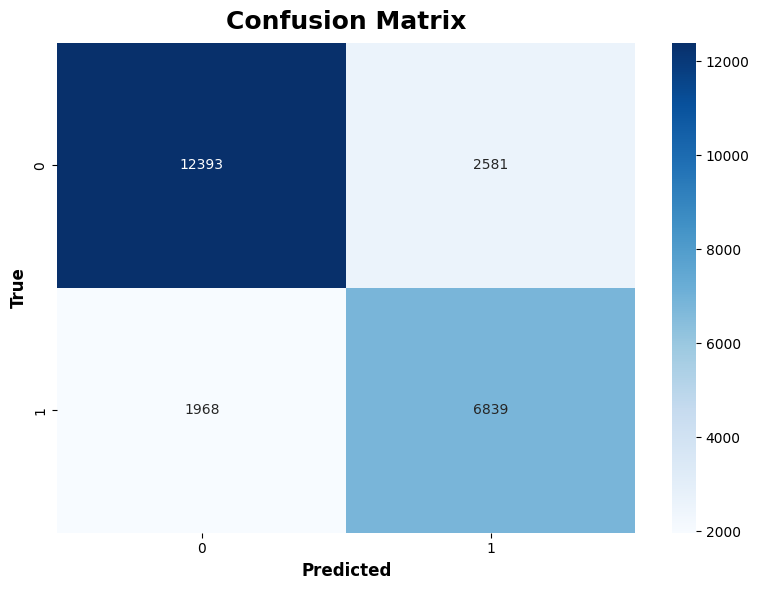

True Positives (is canceled): 6839
True Negatives (is not canceled): 12393
False Positives: 2581
False Negatives: 1968
[[12393  2581]
 [ 1968  6839]]


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns

model = LogisticRegression(solver="liblinear", random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report 0 is not canceled, 1 is canceled
print('Classification Report:')
print(classification_report(y_valid, y_pred))

# Print confusion matrix
labels=np.unique(y_valid)
cm=confusion_matrix(y_valid, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()
print('Confusion Matrix:')

# Create a heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print true positives and true negatives
print(f'True Positives (is canceled): {tp}')
print(f'True Negatives (is not canceled): {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(confusion_matrix(y_valid, y_pred, labels=np.unique(y_valid)))

<h1>Random forest<h1>

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14974
           1       0.87      0.81      0.84      8807

    accuracy                           0.88     23781
   macro avg       0.88      0.87      0.87     23781
weighted avg       0.88      0.88      0.88     23781

Confusion Matrix:


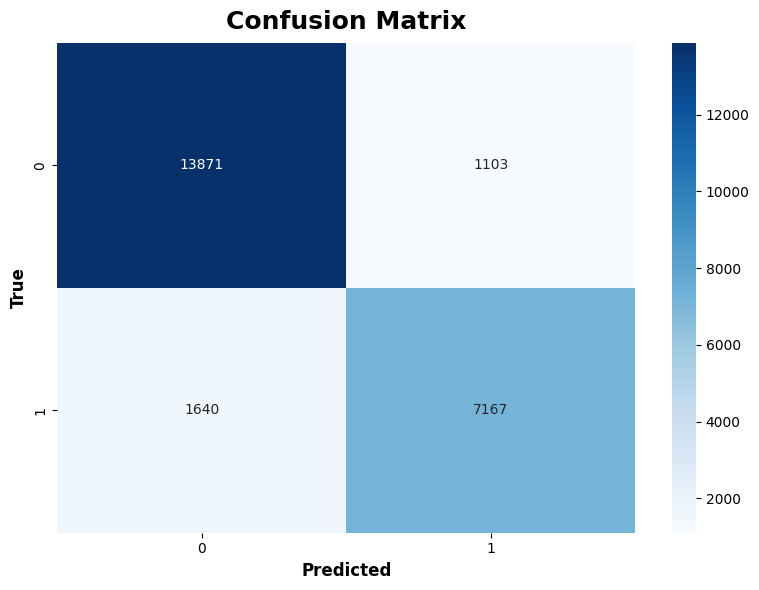

True Positives (is canceled): 7167
True Negatives (is not canceled): 13871
False Positives: 1103
False Negatives: 1640
[[13871  1103]
 [ 1640  7167]]


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(n_estimators=50,random_state=1)
# Define the hyperparameters and their possible values
'''param_grid = {
    'n_estimators': [10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up GridSearchCV
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X, y)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)'''
'''# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print the average performance across all folds
average_score = np.mean(cv_scores)
print("Average Accuracy:", average_score)'''

model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report 0 is not canceled, 1 is canceled
print('Classification Report:')
print(classification_report(y_valid, y_pred))

# Print confusion matrix
labels=np.unique(y_valid)
cm=confusion_matrix(y_valid, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()
print('Confusion Matrix:')

# Create a heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print true positives and true negatives
print(f'True Positives (is canceled): {tp}')
print(f'True Negatives (is not canceled): {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(confusion_matrix(y_valid, y_pred, labels=np.unique(y_valid)))

<h1>Rete neurale<h1>

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.8633 - accuracy: 0.7617 - val_loss: 0.4187 - val_accuracy: 0.6527
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.2378 - accuracy: 0.8240 - val_loss: 0.2000 - val_accuracy: 0.7533
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.8340 - val_loss: 0.1383 - val_accuracy: 0.7999
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.8370 - val_loss: 0.1118 - val_accuracy: 0.8238
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.8405 - val_loss: 0.0979 - val_accuracy: 0.8466
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.8422 - val_loss: 0.0944 - val_accuracy: 0.8420
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.8439 - val_loss: 0.0927 - val_accuracy: 0.8437

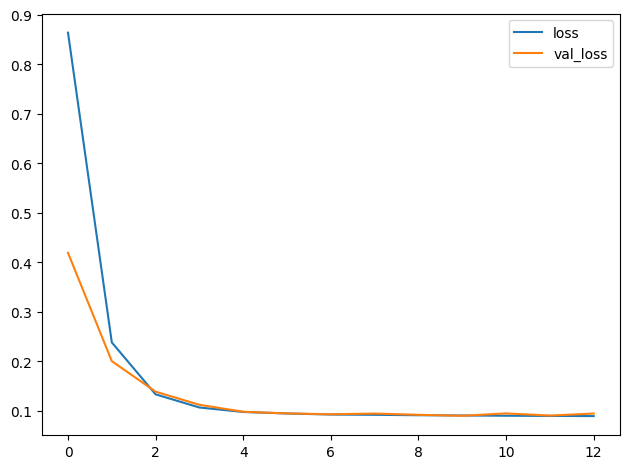

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

all_scores = []
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
input_shape = [X_train.shape[1]]

model = keras.Sequential(
    [ 
        layers.Dense(64, activation="relu", input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer='adam',
    #loss='binary_crossentropy',
    loss='binary_focal_crossentropy',
    #loss='mean_squared_error',
    #loss='huber',
    metrics=['accuracy'],
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=100,
    verbose=1,
    callbacks=[callback], 
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Min Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
print("Max Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))